### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Sport'].describe()

count         13897
unique            9
top       Athletics
freq           5403
Name: Sport, dtype: object

In [4]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [5]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [6]:
female_swim = female_data[female_data['Sport'] == 'Archery']

In [7]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 12887    Archery
12888    Archery
12889    Archery
12890    Archery
12891    Archery
          ...   
13391    Archery
13392    Archery
13393    Archery
13394    Archery
13395    Archery
Name: Sport, Length: 509, dtype: object>

In [8]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 12887        NA
12888        NA
12889        NA
12890        NA
12891        NA
          ...  
13391        NA
13392        NA
13393    Silver
13394      Gold
13395    Silver
Name: Medal, Length: 509, dtype: object>

In [9]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 12887 to 13395
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      509 non-null    int64  
 1   Unnamed: 0_x    509 non-null    int64  
 2   ID              509 non-null    int64  
 3   Name            509 non-null    object 
 4   Sex             509 non-null    object 
 5   Age             509 non-null    float64
 6   Height          509 non-null    float64
 7   Weight          509 non-null    float64
 8   NOC             509 non-null    object 
 9   Games           509 non-null    object 
 10  Year            509 non-null    int64  
 11  Season          509 non-null    object 
 12  City            509 non-null    object 
 13  Sport           509 non-null    object 
 14  Event           509 non-null    object 
 15  Medal           509 non-null    object 
 16  Team            509 non-null    object 
 17  Unnamed: 0_y    509 non-null 

In [10]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [11]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (381, 1) (381, 6)
Test Set  : (128, 1) (128, 6)


In [12]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [13]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
13182,31.0,55.0,170.0,4.050000e+11,67007855.0,6044.067520,NA
13249,26.0,63.0,160.0,3.700000e+11,46881475.0,7892.243151,NA
13166,39.0,70.0,170.0,1.950000e+12,82211508.0,23719.307034,NA
13044,31.0,65.0,163.0,4.940000e+12,126994511.0,38899.319042,NA
13127,19.0,75.0,163.0,1.620000e+13,313998379.0,51592.623031,NA
...,...,...,...,...,...,...,...
13116,20.0,60.0,170.0,3.530000e+11,5493621.0,64256.343858,NA
13226,30.0,79.0,175.0,5.125274e+09,4245000.0,1207.367228,NA
13043,31.0,65.0,163.0,4.940000e+12,126994511.0,38899.319042,NA
13328,28.0,68.0,180.0,3.480000e+12,82667685.0,42096.255629,Silver


In [14]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        446
Bronze     23
Silver     20
Gold       20
Name: Medal, dtype: int64


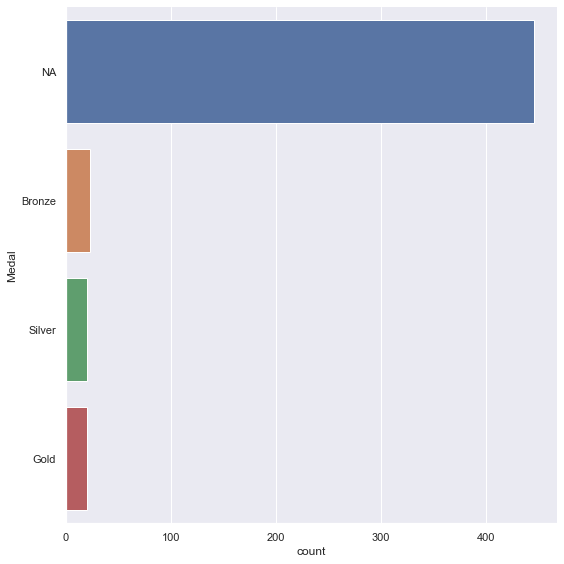

In [15]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [16]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(381, 6) (381, 1)


In [17]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1332, 6) (1332, 1)


In [18]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,31.000000,55.000000,170.000000,4.050000e+11,6.700786e+07,6044.067520,NA
1,26.000000,63.000000,160.000000,3.700000e+11,4.688148e+07,7892.243151,NA
2,39.000000,70.000000,170.000000,1.950000e+12,8.221151e+07,23719.307034,NA
3,31.000000,65.000000,163.000000,4.940000e+12,1.269945e+08,38899.319042,NA
4,19.000000,75.000000,163.000000,1.620000e+13,3.139984e+08,51592.623031,NA
...,...,...,...,...,...,...,...
1327,22.030518,59.030518,171.368938,1.280000e+12,1.443424e+08,8867.803469,Silver
1328,26.752622,76.293207,169.000000,1.280000e+12,1.443424e+08,8867.803469,Silver
1329,25.011278,63.282492,174.305047,1.207258e+12,1.307457e+08,9862.624528,Silver
1330,19.393039,65.589558,164.245649,7.903019e+11,5.280936e+07,15564.951559,Silver


In [19]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
13051,21.0,61.0,173.0,2.820000e+12,8.251626e+07,34175.082584
12967,20.0,53.0,168.0,1.410000e+12,5.120000e+07,27539.062500
13146,29.0,64.0,174.0,4.710000e+11,3.794802e+07,12411.716070
13039,24.0,65.0,179.0,6.200000e+12,1.276290e+08,48578.301170
13342,17.0,67.0,155.0,1.190000e+12,1.197147e+09,994.030051
...,...,...,...,...,...,...
13004,23.0,69.0,162.0,1.279504e+10,4.030000e+06,3174.949001
12902,18.0,61.0,164.0,1.190000e+12,1.208283e+08,9848.685540
13259,24.0,64.0,169.0,1.190000e+12,1.208283e+08,9848.685540
13134,19.0,55.0,166.0,4.960000e+09,2.334690e+07,212.447942


Number of Medal Types : 4
Bronze    333
Gold      333
NA        333
Silver    333
Name: Medal, dtype: int64


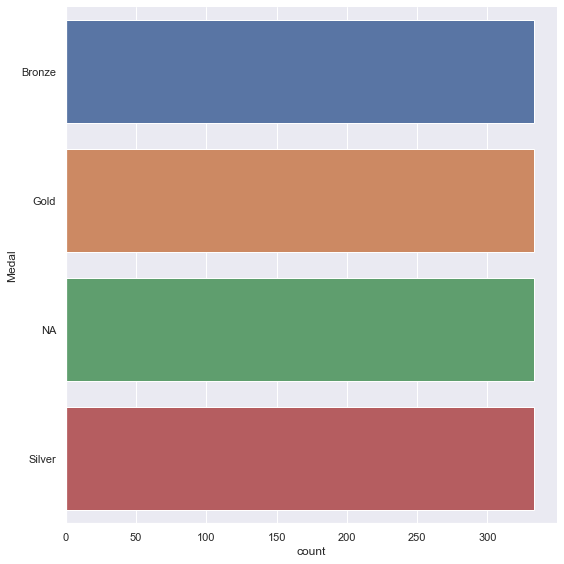

In [20]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (999, 1) (999, 6)
Test Set  : (333, 1) (333, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.987987987987988

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.918918918918919



<AxesSubplot:>

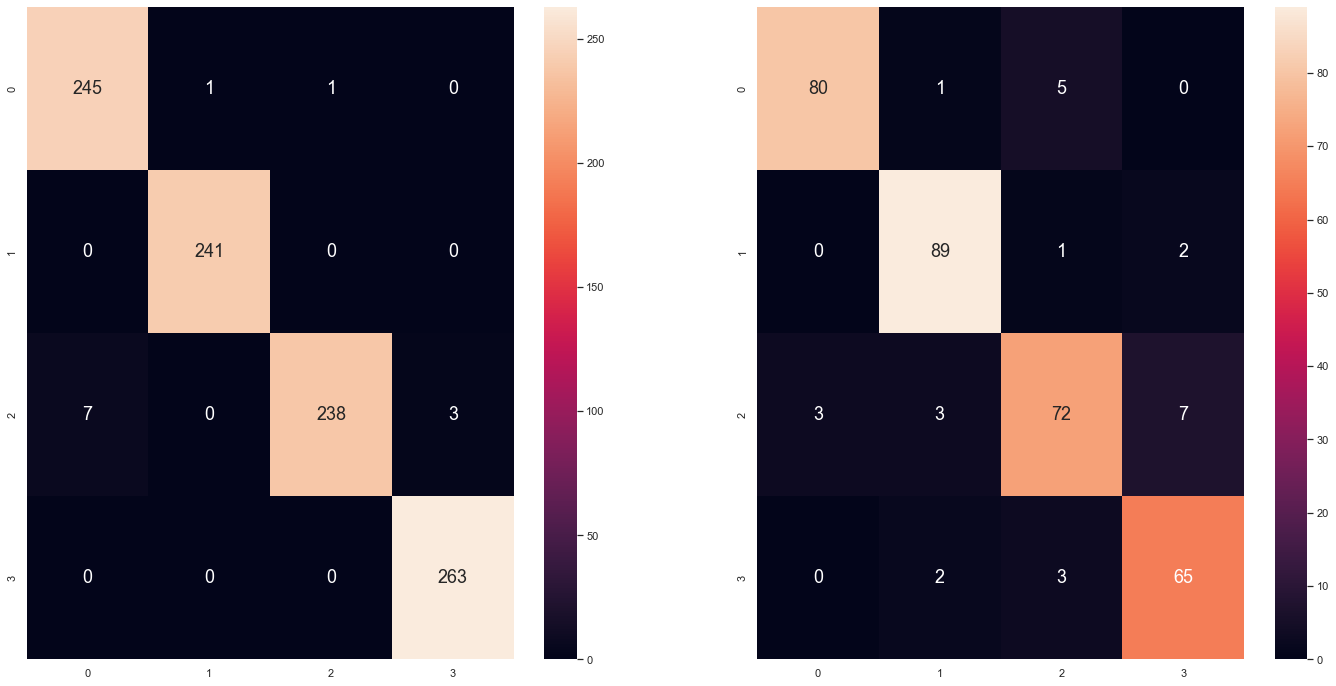

In [21]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

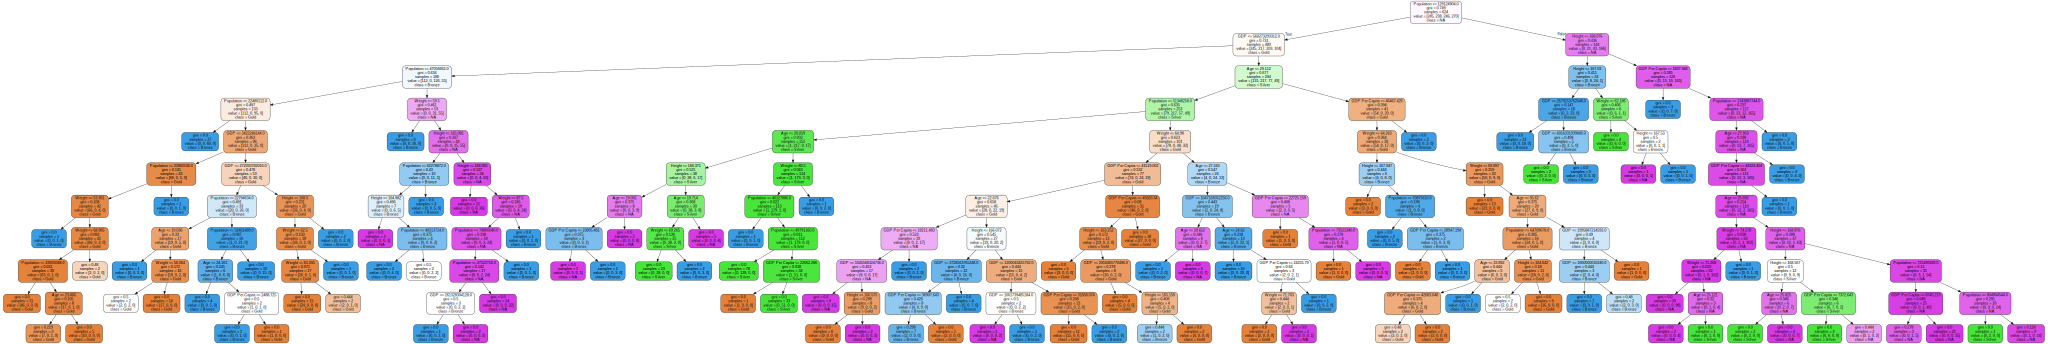

In [22]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [23]:
graph.render("Tree_female_ARCHERY")

'Tree_female_ARCHERY.pdf'

### Predictions

In [24]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.8125


<AxesSubplot:>

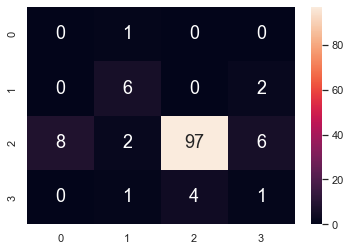

In [25]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})